In [25]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.optimizers import Adam,Adagrad
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# 관련 라이브러리 임포트 
import matplotlib.font_manager as fm
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.style.use('ggplot')

# 1.
```
1. trees.csv를 읽어들여서 아래에 대해
 Volume을 예측해 보세요.(텐서, 케라스, 정규화후 처리) patience 100 early stop
Girth 8.8, 10.5
Height 63, 72
```


# 텐서

In [44]:
df.head(3)

,Girth,Height,Volume,정도
0,8.3,70,10.3,적음
1,8.6,65,10.3,적음
2,8.8,63,10.2,적음


In [26]:
df = pd.read_csv('../tdata/trees.csv',encoding='euc-kr')
df.head(3)
x_data = df.iloc[:,:-1].values
y_data = df.iloc[:,[-1]].values



w = tf.Variable(tf.random.uniform([2,1]))
b = tf.Variable(tf.random.uniform([1]))


scaler = MinMaxScaler()
x_norm = scaler.fit_transform(x_data)


x = tf.constant(x_norm, tf.float32)
y = tf.constant(y_data, tf.float32)



In [27]:
def compute_loss():
    hx = tf.matmul(x,w) + b 
    cost = tf.reduce_mean((hx-y)**2)
    
    return cost

In [28]:
patience = 100  
min_delta = 0.01  # (전 - 후) 값을 했을 때 이 숫자보다 작으면 조기종료 
hist_cost = [] 

pcnt = 0
optimizer = Adam(0.1)
for i in range(1000):
    optimizer.minimize(compute_loss, var_list=[w,b])  # 미분 
    c = compute_loss().numpy()
    hist_cost.append(c)

    print(i, 'cost: ',c)
    
    if i>0:
        if hist_cost[i-1] - hist_cost[i] > min_delta:
            pcnt = 0
        else:
            pcnt += 1
        if pcnt >= patience : 
            print('early stop')
            break

0 cost:  1091.0715
1 cost:  1078.61
2 cost:  1066.2316
3 cost:  1053.9375
4 cost:  1041.7292
5 cost:  1029.6079
6 cost:  1017.5747
7 cost:  1005.6309
8 cost:  993.77783
9 cost:  982.01624
10 cost:  970.34735
11 cost:  958.7721
12 cost:  947.2913
13 cost:  935.90625
14 cost:  924.61743
15 cost:  913.4256
16 cost:  902.3316
17 cost:  891.33606
18 cost:  880.4395
19 cost:  869.6425
20 cost:  858.94556
21 cost:  848.3491
22 cost:  837.85345
23 cost:  827.459
24 cost:  817.16583
25 cost:  806.9745
26 cost:  796.8847
27 cost:  786.8969
28 cost:  777.011
29 cost:  767.227
30 cost:  757.5449
31 cost:  747.9647
32 cost:  738.4862
33 cost:  729.10913
34 cost:  719.83356
35 cost:  710.659
36 cost:  701.58545
37 cost:  692.61237
38 cost:  683.7395
39 cost:  674.96655
40 cost:  666.2931
41 cost:  657.7187
42 cost:  649.2429
43 cost:  640.8654
44 cost:  632.58563
45 cost:  624.403
46 cost:  616.31714
47 cost:  608.3274
48 cost:  600.43317
49 cost:  592.6341
50 cost:  584.92944
51 cost:  577.31866
52

429 cost:  81.31891
430 cost:  81.21319
431 cost:  81.1075
432 cost:  81.001884
433 cost:  80.89628
434 cost:  80.790726
435 cost:  80.68521
436 cost:  80.579735
437 cost:  80.47431
438 cost:  80.368904
439 cost:  80.26354
440 cost:  80.15823
441 cost:  80.05297
442 cost:  79.94774
443 cost:  79.84255
444 cost:  79.73741
445 cost:  79.632324
446 cost:  79.52727
447 cost:  79.42223
448 cost:  79.31725
449 cost:  79.21234
450 cost:  79.10746
451 cost:  79.00262
452 cost:  78.89782
453 cost:  78.793076
454 cost:  78.688385
455 cost:  78.58373
456 cost:  78.47911
457 cost:  78.37454
458 cost:  78.270035
459 cost:  78.165565
460 cost:  78.06114
461 cost:  77.95678
462 cost:  77.85246
463 cost:  77.74818
464 cost:  77.643936
465 cost:  77.53977
466 cost:  77.435646
467 cost:  77.33154
468 cost:  77.22752
469 cost:  77.123535
470 cost:  77.01962
471 cost:  76.91573
472 cost:  76.811905
473 cost:  76.708115
474 cost:  76.60441
475 cost:  76.50074
476 cost:  76.39712
477 cost:  76.29354
478 cos

877 cost:  41.851833
878 cost:  41.7868
879 cost:  41.72187
880 cost:  41.657055
881 cost:  41.59234
882 cost:  41.527733
883 cost:  41.463245
884 cost:  41.398857
885 cost:  41.33459
886 cost:  41.270405
887 cost:  41.20637
888 cost:  41.14242
889 cost:  41.07859
890 cost:  41.014854
891 cost:  40.951237
892 cost:  40.88772
893 cost:  40.82432
894 cost:  40.761032
895 cost:  40.69784
896 cost:  40.634773
897 cost:  40.5718
898 cost:  40.508945
899 cost:  40.446194
900 cost:  40.38356
901 cost:  40.321022
902 cost:  40.2586
903 cost:  40.19628
904 cost:  40.13408
905 cost:  40.071983
906 cost:  40.009995
907 cost:  39.94811
908 cost:  39.88634
909 cost:  39.82468
910 cost:  39.76312
911 cost:  39.701675
912 cost:  39.640335
913 cost:  39.579105
914 cost:  39.51798
915 cost:  39.456974
916 cost:  39.39606
917 cost:  39.335255
918 cost:  39.27457
919 cost:  39.213974
920 cost:  39.1535
921 cost:  39.093136
922 cost:  39.03287
923 cost:  38.97271
924 cost:  38.912663
925 cost:  38.85273
9

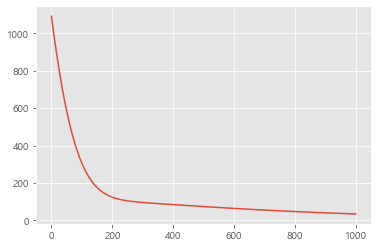

In [29]:
plt.plot(hist_cost)

In [30]:
def hxfn( xdata):
    xd = tf.constant( xdata ,tf.float32)
    hx = tf.matmul( xd, w) +b
    return hx.numpy()

In [31]:
xn = scaler.transform( [[8.8, 63], [10.5, 72]] )
xn

array([[0.04065041, 0.        ],
       [0.17886179, 0.375     ]])

In [32]:
result = hxfn(xn)
result

array([[ 8.754312],
       [19.79776 ]], dtype=float32)

# 케라스

In [33]:
df = pd.read_csv('../tdata/trees.csv',encoding='euc-kr')
df.head(3)
x_data = df.iloc[:,:-1].values
y_data = df.iloc[:,[-1]].values



w = tf.Variable(tf.random.uniform([2,1]))
b = tf.Variable(tf.random.uniform([1]))


scaler = MinMaxScaler()
x_norm = scaler.fit_transform(x_data)


x = tf.constant(x_norm, tf.float32)
y = tf.constant(y_data, tf.float32)

In [34]:
dense  = Dense(units = 1, input_dim=2)
model = Sequential([dense])
model.compile(loss = 'mse', optimizer = Adam(0.1))
earlyStop = EarlyStopping(monitor = 'loss',min_delta=0.01, patience=100)
h = model.fit(x_norm, y ,epochs=1000, callbacks=[earlyStop])

Epoch 1/1000
1/1 [==============================] - 0s 156ms/step - loss: 1143.6919
Epoch 2/1000
1/1 [==============================] - 0s 2ms/step - loss: 1130.8591
Epoch 3/1000
1/1 [==============================] - 0s 2ms/step - loss: 1118.1082
Epoch 4/1000
1/1 [==============================] - 0s 996us/step - loss: 1105.4399
Epoch 5/1000
1/1 [==============================] - 0s 3ms/step - loss: 1092.8563
Epoch 6/1000
1/1 [==============================] - 0s 2ms/step - loss: 1080.3584
Epoch 7/1000
1/1 [==============================] - 0s 2ms/step - loss: 1067.9474
Epoch 8/1000
1/1 [==============================] - 0s 996us/step - loss: 1055.6246
Epoch 9/1000
1/1 [==============================] - 0s 997us/step - loss: 1043.3914
Epoch 10/1000
1/1 [==============================] - 0s 2ms/step - loss: 1031.2485
Epoch 11/1000
1/1 [==============================] - 0s 997us/step - loss: 1019.1974
Epoch 12/1000
1/1 [==============================] - 0s 998us/step - loss: 1007.2390
E

1/1 [==============================] - 0s 997us/step - loss: 330.4122
Epoch 100/1000
1/1 [==============================] - 0s 2ms/step - loss: 326.2147
Epoch 101/1000
1/1 [==============================] - 0s 2ms/step - loss: 322.0793
Epoch 102/1000
1/1 [==============================] - 0s 2ms/step - loss: 318.0055
Epoch 103/1000
1/1 [==============================] - 0s 2ms/step - loss: 313.9924
Epoch 104/1000
1/1 [==============================] - 0s 2ms/step - loss: 310.0395
Epoch 105/1000
1/1 [==============================] - 0s 2ms/step - loss: 306.1461
Epoch 106/1000
1/1 [==============================] - 0s 2ms/step - loss: 302.3116
Epoch 107/1000
1/1 [==============================] - 0s 998us/step - loss: 298.5352
Epoch 108/1000
1/1 [==============================] - 0s 998us/step - loss: 294.8164
Epoch 109/1000
1/1 [==============================] - 0s 998us/step - loss: 291.1546
Epoch 110/1000
1/1 [==============================] - 0s 2ms/step - loss: 287.5490
Epoch 111/1

1/1 [==============================] - 0s 998us/step - loss: 126.1652
Epoch 197/1000
1/1 [==============================] - 0s 2ms/step - loss: 125.4146
Epoch 198/1000
1/1 [==============================] - 0s 997us/step - loss: 124.6788
Epoch 199/1000
1/1 [==============================] - 0s 998us/step - loss: 123.9575
Epoch 200/1000
1/1 [==============================] - 0s 997us/step - loss: 123.2505
Epoch 201/1000
1/1 [==============================] - 0s 998us/step - loss: 122.5575
Epoch 202/1000
1/1 [==============================] - 0s 997us/step - loss: 121.8782
Epoch 203/1000
1/1 [==============================] - 0s 997us/step - loss: 121.2123
Epoch 204/1000
1/1 [==============================] - 0s 998us/step - loss: 120.5596
Epoch 205/1000
1/1 [==============================] - 0s 996us/step - loss: 119.9199
Epoch 206/1000
1/1 [==============================] - 0s 997us/step - loss: 119.2927
Epoch 207/1000
1/1 [==============================] - 0s 997us/step - loss: 118.67

1/1 [==============================] - 0s 2ms/step - loss: 92.6246
Epoch 294/1000
1/1 [==============================] - 0s 998us/step - loss: 92.4799
Epoch 295/1000
1/1 [==============================] - 0s 998us/step - loss: 92.3367
Epoch 296/1000
1/1 [==============================] - 0s 2ms/step - loss: 92.1950
Epoch 297/1000
1/1 [==============================] - 0s 997us/step - loss: 92.0545
Epoch 298/1000
1/1 [==============================] - 0s 998us/step - loss: 91.9154
Epoch 299/1000
1/1 [==============================] - 0s 997us/step - loss: 91.7776
Epoch 300/1000
1/1 [==============================] - 0s 997us/step - loss: 91.6410
Epoch 301/1000
1/1 [==============================] - 0s 997us/step - loss: 91.5057
Epoch 302/1000
1/1 [==============================] - 0s 997us/step - loss: 91.3715
Epoch 303/1000
1/1 [==============================] - 0s 997us/step - loss: 91.2385
Epoch 304/1000
1/1 [==============================] - 0s 2ms/step - loss: 91.1066
Epoch 305/100

1/1 [==============================] - 0s 997us/step - loss: 81.6510
Epoch 392/1000
1/1 [==============================] - 0s 997us/step - loss: 81.5517
Epoch 393/1000
1/1 [==============================] - 0s 2ms/step - loss: 81.4525
Epoch 394/1000
1/1 [==============================] - 0s 997us/step - loss: 81.3533
Epoch 395/1000
1/1 [==============================] - 0s 2ms/step - loss: 81.2542
Epoch 396/1000
1/1 [==============================] - 0s 2ms/step - loss: 81.1551
Epoch 397/1000
1/1 [==============================] - 0s 998us/step - loss: 81.0561
Epoch 398/1000
1/1 [==============================] - 0s 998us/step - loss: 80.9571
Epoch 399/1000
1/1 [==============================] - 0s 2ms/step - loss: 80.8582
Epoch 400/1000
1/1 [==============================] - 0s 2ms/step - loss: 80.7594
Epoch 401/1000
1/1 [==============================] - 0s 997us/step - loss: 80.6606
Epoch 402/1000
1/1 [==============================] - 0s 997us/step - loss: 80.5619
Epoch 403/1000
1/

1/1 [==============================] - 0s 997us/step - loss: 72.1281
Epoch 490/1000
1/1 [==============================] - 0s 998us/step - loss: 72.0329
Epoch 491/1000
1/1 [==============================] - 0s 998us/step - loss: 71.9379
Epoch 492/1000
1/1 [==============================] - 0s 997us/step - loss: 71.8428
Epoch 493/1000
1/1 [==============================] - 0s 997us/step - loss: 71.7479
Epoch 494/1000
1/1 [==============================] - 0s 998us/step - loss: 71.6529
Epoch 495/1000
1/1 [==============================] - 0s 998us/step - loss: 71.5581
Epoch 496/1000
1/1 [==============================] - 0s 2ms/step - loss: 71.4632
Epoch 497/1000
1/1 [==============================] - 0s 998us/step - loss: 71.3685
Epoch 498/1000
1/1 [==============================] - 0s 997us/step - loss: 71.2738
Epoch 499/1000
1/1 [==============================] - 0s 997us/step - loss: 71.1791
Epoch 500/1000
1/1 [==============================] - 0s 997us/step - loss: 71.0845
Epoch 501

1/1 [==============================] - 0s 997us/step - loss: 63.0820
Epoch 588/1000
1/1 [==============================] - 0s 998us/step - loss: 62.9931
Epoch 589/1000
1/1 [==============================] - 0s 2ms/step - loss: 62.9042
Epoch 590/1000
1/1 [==============================] - 0s 997us/step - loss: 62.8153
Epoch 591/1000
1/1 [==============================] - 0s 997us/step - loss: 62.7266
Epoch 592/1000
1/1 [==============================] - 0s 997us/step - loss: 62.6379
Epoch 593/1000
1/1 [==============================] - 0s 997us/step - loss: 62.5493
Epoch 594/1000
1/1 [==============================] - 0s 997us/step - loss: 62.4608
Epoch 595/1000
1/1 [==============================] - 0s 2ms/step - loss: 62.3724
Epoch 596/1000
1/1 [==============================] - 0s 998us/step - loss: 62.2840
Epoch 597/1000
1/1 [==============================] - 0s 2ms/step - loss: 62.1957
Epoch 598/1000
1/1 [==============================] - 0s 997us/step - loss: 62.1075
Epoch 599/100

1/1 [==============================] - 0s 997us/step - loss: 54.7523
Epoch 686/1000
1/1 [==============================] - 0s 997us/step - loss: 54.6717
Epoch 687/1000
1/1 [==============================] - 0s 997us/step - loss: 54.5911
Epoch 688/1000
1/1 [==============================] - 0s 997us/step - loss: 54.5106
Epoch 689/1000
1/1 [==============================] - 0s 998us/step - loss: 54.4303
Epoch 690/1000
1/1 [==============================] - 0s 998us/step - loss: 54.3500
Epoch 691/1000
1/1 [==============================] - 0s 2ms/step - loss: 54.2698
Epoch 692/1000
1/1 [==============================] - 0s 998us/step - loss: 54.1897
Epoch 693/1000
1/1 [==============================] - 0s 2ms/step - loss: 54.1096
Epoch 694/1000
1/1 [==============================] - 0s 997us/step - loss: 54.0297
Epoch 695/1000
1/1 [==============================] - 0s 997us/step - loss: 53.9499
Epoch 696/1000
1/1 [==============================] - 0s 998us/step - loss: 53.8702
Epoch 697/1

1/1 [==============================] - 0s 997us/step - loss: 47.3017
Epoch 784/1000
1/1 [==============================] - 0s 997us/step - loss: 47.2305
Epoch 785/1000
1/1 [==============================] - 0s 998us/step - loss: 47.1594
Epoch 786/1000
1/1 [==============================] - 0s 997us/step - loss: 47.0885
Epoch 787/1000
1/1 [==============================] - 0s 998us/step - loss: 47.0176
Epoch 788/1000
1/1 [==============================] - 0s 998us/step - loss: 46.9468
Epoch 789/1000
1/1 [==============================] - 0s 997us/step - loss: 46.8761
Epoch 790/1000
1/1 [==============================] - 0s 997us/step - loss: 46.8055
Epoch 791/1000
1/1 [==============================] - 0s 997us/step - loss: 46.7351
Epoch 792/1000
1/1 [==============================] - 0s 997us/step - loss: 46.6647
Epoch 793/1000
1/1 [==============================] - 0s 2ms/step - loss: 46.5944
Epoch 794/1000
1/1 [==============================] - 0s 998us/step - loss: 46.5242
Epoch 795

1/1 [==============================] - 0s 2ms/step - loss: 40.8027
Epoch 882/1000
1/1 [==============================] - 0s 2ms/step - loss: 40.7414
Epoch 883/1000
1/1 [==============================] - 0s 997us/step - loss: 40.6801
Epoch 884/1000
1/1 [==============================] - 0s 2ms/step - loss: 40.6190
Epoch 885/1000
1/1 [==============================] - 0s 996us/step - loss: 40.5579
Epoch 886/1000
1/1 [==============================] - 0s 997us/step - loss: 40.4970
Epoch 887/1000
1/1 [==============================] - 0s 997us/step - loss: 40.4361
Epoch 888/1000
1/1 [==============================] - 0s 997us/step - loss: 40.3754
Epoch 889/1000
1/1 [==============================] - 0s 997us/step - loss: 40.3147
Epoch 890/1000
1/1 [==============================] - 0s 997us/step - loss: 40.2542
Epoch 891/1000
1/1 [==============================] - 0s 997us/step - loss: 40.1937
Epoch 892/1000
1/1 [==============================] - 0s 2ms/step - loss: 40.1334
Epoch 893/1000


1/1 [==============================] - 0s 997us/step - loss: 35.2589
Epoch 980/1000
1/1 [==============================] - 0s 997us/step - loss: 35.2071
Epoch 981/1000
1/1 [==============================] - 0s 997us/step - loss: 35.1554
Epoch 982/1000
1/1 [==============================] - 0s 998us/step - loss: 35.1038
Epoch 983/1000
1/1 [==============================] - 0s 2ms/step - loss: 35.0523
Epoch 984/1000
1/1 [==============================] - 0s 997us/step - loss: 35.0009
Epoch 985/1000
1/1 [==============================] - 0s 1ms/step - loss: 34.9496
Epoch 986/1000
1/1 [==============================] - 0s 997us/step - loss: 34.8984
Epoch 987/1000
1/1 [==============================] - 0s 997us/step - loss: 34.8473
Epoch 988/1000
1/1 [==============================] - 0s 1ms/step - loss: 34.7963
Epoch 989/1000
1/1 [==============================] - 0s 998us/step - loss: 34.7454
Epoch 990/1000
1/1 [==============================] - 0s 998us/step - loss: 34.6945
Epoch 991/100

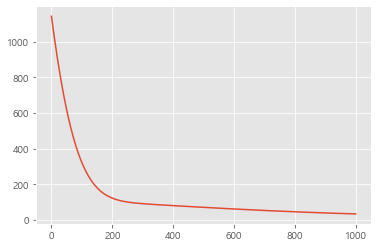

In [35]:
plt.plot(h.history['loss'])

In [36]:
xn1 = scaler.transform( np.array([8.8,63]).reshape(1,-1)  )
xn2 = scaler.transform( np.array([10.5,72]).reshape(1,-1)  )
model.predict(xn1),model.predict(xn2)

(array([[8.757011]], dtype=float32), array([[19.766644]], dtype=float32))

# 2
```
2. volume이 40 이상이면 크다
30이상이면 보통 미만이면 적음으로
아래와 같이 출력하시요
volume  정도
============
 10.3    적음
```

In [37]:
df['Volume'].max()

77.0

In [38]:
df['정도'] = pd.cut(x= df['Volume'] , bins =[0,30,40,80], labels = ['적음','보통','큼'])
df.sample(7)

,Girth,Height,Volume,정도
7,11.0,75,18.2,적음
9,11.2,75,19.9,적음
25,17.3,81,55.4,큼
18,13.7,71,25.7,적음
23,16.0,72,38.3,보통
8,11.1,80,22.6,적음
20,14.0,78,34.5,보통


In [39]:
# np.where(df['Volume']>40,'크다'

3. Height  가 가장 작은값과 큰값을
구하시요

In [40]:
df['Height'].max() ,df['Height'].min()

(87, 63)

4. girth(테두리) 가 가장큰 top5를
출력하세요  
(girth, height, volume)

In [41]:
df.nlargest(5,'Girth')

,Girth,Height,Volume,정도
30,20.6,87,77.0,큼
28,18.0,80,51.5,큼
29,18.0,80,51.0,큼
27,17.9,80,58.3,큼
26,17.5,82,55.7,큼
